# Solve differential equations in Python

https://apmonitor.com/che263/index.php/Main/PythonDynamicSim

## Problem
https://apmonitor.com/che263/uploads/Main/gravity_tanks.pdf

El ejercicio esta en ode_tanks.ods (Spreadsheet)

![Ejercicio](./misc/Screenshot_12-9-2024_185846_apmonitor.com.jpeg)

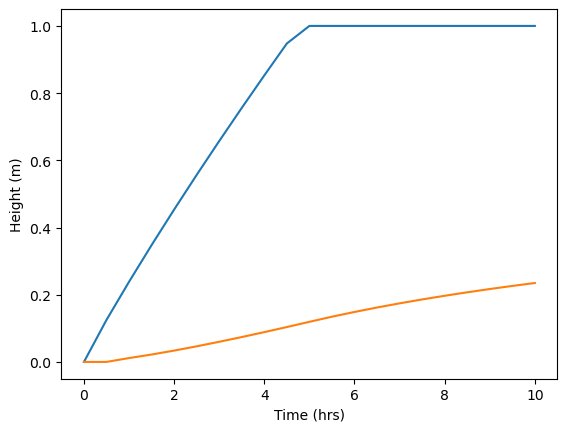

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def tank(c1,c2):
  Ac = 2 # m^2
  qin = 0.5 # m^3/hr
  dt = 0.5 # hr
  tf = 10.0 # hr

  h1 = 0
  h2 = 0
  t = 0
  ts = np.empty(21)
  h1s = np.empty(21)
  h2s = np.empty(21)
  i = 0
  while t<=10.0:
     ts[i] = t
     h1s[i] = h1
     h2s[i] = h2

     qout1 = c1 * pow(h1,0.5) # pow(. , 0.5) es la sqrt
     qout2 = c2 * pow(h2,0.5)
     h1 = (qin-qout1)*dt/Ac + h1
     if h1>1:
        h1 = 1
     h2 = (qout1-qout2)*dt/Ac + h2
     i = i + 1
     t = t + dt

  # plot data
  plt.figure(1)
  plt.plot(ts,h1s)
  plt.plot(ts,h2s)
  plt.xlabel("Time (hrs)")
  plt.ylabel("Height (m)")
  plt.show()

# call function
tank(0.13,0.20)

## La ODE con scipy

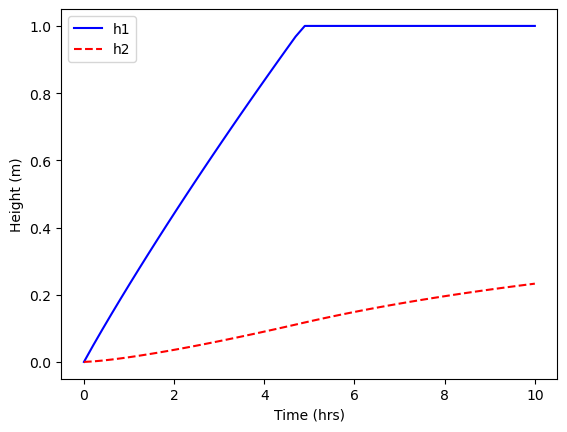

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def tank(h,t):
   # constants
   c1 = 0.13
   c2 = 0.20
   Ac = 2      # m^2
   # inflow
   qin = 0.5   # m^3/hr
   # outflow
   qout1 = c1 * h[0]**0.5
   qout2 = c2 * h[1]**0.5
   # differential equations
   dhdt1 = (qin   - qout1) / Ac
   dhdt2 = (qout1 - qout2) / Ac
   # overflow conditions
   if h[0]>=1 and dhdt1>=0:
       dhdt1 = 0
   if h[1]>=1 and dhdt2>=0:
       dhdt2 = 0
   dhdt = [dhdt1,dhdt2]
   return dhdt

# integrate the equations
t = np.linspace(0,10) # times to report solution
h0 = [0,0]            # initial conditions for height
y = odeint(tank,h0,t) # integrate

# plot results
plt.figure(1)
plt.plot(t,y[:,0],'b-')
plt.plot(t,y[:,1],'r--')
plt.xlabel('Time (hrs)')
plt.ylabel('Height (m)')
plt.legend(['h1','h2'])
plt.show()